# Comparative Analysis

In scientific research, comparing disturbed or disease samples with control samples allows for the exploration of changes in functional mechanisms at both global and local levels. Stereopy is specifically designed to identify global and local diversities in comparative samples by employing cell-level and gene-level analysis modules, supported by novel algorithms. The cell-level analysis focuses on cell diversity in terms of cell type, cell-cell occurrence, and cell community via multi-sample comparisons. At gene level, Stereopy investigates gene diversity within cell types and cell communities, proposing the concept of constant and conditional markers [[Fang23]](https://doi.org/10.1101/2023.12.04.569485).

Here we use Slide-seq mouse kidney samples to test comparative analysis [[Marshall22](https://pubmed.ncbi.nlm.nih.gov/35372810/)]. Please download [test data](http://116.6.21.110:8090/share/3ca60300-e8bd-4d67-8b68-14267e428523), and here also offers the access to [full data](https://cellxgene.cziscience.com/collections/8e880741-bf9a-4c8e-9227-934204631d2a) from the paper.

## Preparing data

In [1]:
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator

In [2]:
ms_data = MSData(_var_type='union')
data = st.io.read_h5ad('../../data/Puck_191223_19.h5ad', spatial_key='X_spatial')
ms_data['WT'] = data
data = st.io.read_h5ad('../../data/Puck_200104_07.h5ad', spatial_key='X_spatial')
ms_data['UMOD_KI'] = data

## merge data
ms_data.integrate()

## merged author_cell_type col to ms_data
ms_data.to_integrate(res_key = 'author_cell_type', scope = slice_generator[:], _from=slice_generator[:], type='obs', item='author_cell_type')
ms_data

ms_data: {'WT': (36299, 21296), 'UMOD_KI': (31194, 21263)}
num_slice: 2
names: ['WT', 'UMOD_KI']
merged_data: id(140056957462992)
obs: ['batch', 'author_cell_type']
var: []
relationship: other
var_type: union to 22656
current_mode: integrate
current_scope: scope_[0,1]
scopes_data: ['scope_[0,1]:id(140056957462992)']
mss: ["scope_[0,1]:['author_cell_type']"]

[2024-08-29 18:01:02][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run cluster_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

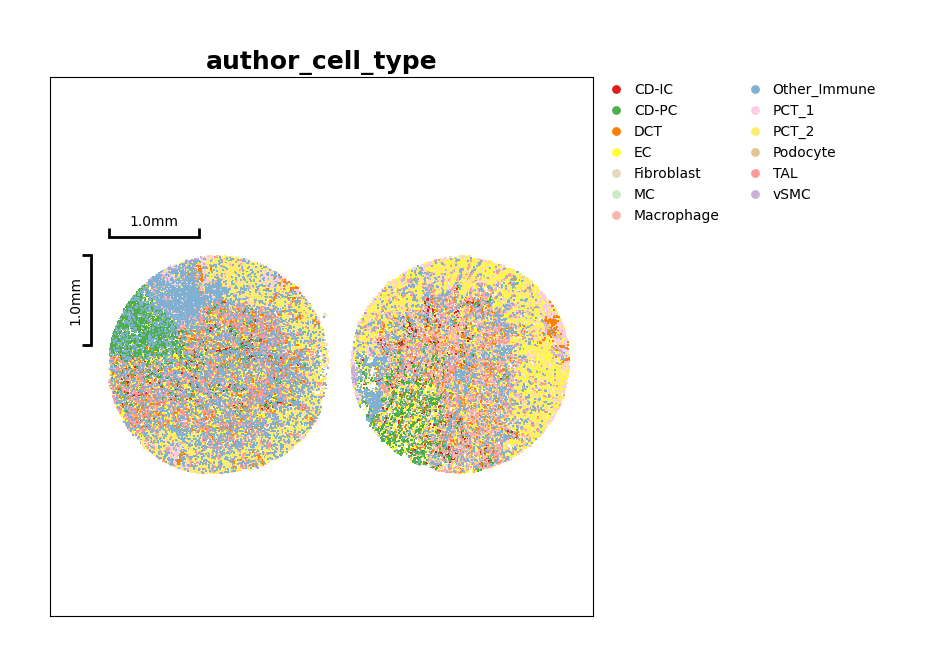

In [3]:
ms_data.plt.cluster_scatter(
    mode='integrate',
    scope=slice_generator[:],
    res_key='author_cell_type',
    reorganize_coordinate=2,
    horizontal_offset_additional=500
    )

## Cell Co-occurrence of Comparative Analysis

Here we use cell co-occurrence to discover the global cell diversity.

See [Co-occurrence](https://stereopy.readthedocs.io/en/latest/Tutorials/Cell_Co_Occurrence.html) for more imformation.

In [4]:
ms_data['WT'].tl.co_occurrence(
        method='stereopy',
        cluster_res_key='author_cell_type', 
        res_key='co-occurrence',
        dist_thres=180, # max threshold to measure co-occurence
        steps=6,  # step numbers to divide threshold interval evenly
        genelist=None,
        gene_thresh=0, # min threshold for gene expression in a cell
        n_jobs=-1
        )

[2024-08-29 18:01:02][Stereo][785302][MainThread][140059044030272][st_pipeline][77][INFO]: register algorithm co_occurrence to <stereo.core.st_pipeline.AnnBasedStPipeline object at 0x7f618d32a7c0>


AnnData object with n_obs × n_vars = 36299 × 21296
    obs: 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sample', 'tissue_ontology_term_id', 'disease_state', 'sex_ontology_term_id', 'genotype', 'development_stage_ontology_term_id', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title', 'sn', 'co-occurrence', 'key_record'
    obsm: 'X_spatial'

In [5]:
ms_data['UMOD_KI'].tl.co_occurrence(
        method='stereopy',
        cluster_res_key='author_cell_type', 
        res_key='co-occurrence',
        dist_thres=180, # max threshold to measure co-occurence
        steps=6,  # step numbers to divide threshold interval evenly
        genelist=None,
        gene_thresh=0, # min threshold for gene expression in a cell
        n_jobs=-1
        )

[2024-08-29 18:01:12][Stereo][785302][MainThread][140059044030272][st_pipeline][77][INFO]: register algorithm co_occurrence to <stereo.core.st_pipeline.AnnBasedStPipeline object at 0x7f618cc39fa0>


AnnData object with n_obs × n_vars = 31194 × 21263
    obs: 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sample', 'tissue_ontology_term_id', 'disease_state', 'sex_ontology_term_id', 'genotype', 'development_stage_ontology_term_id', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title', 'sn', 'co-occurrence', 'key_record'
    obsm: 'X_spatial'

## Co-occurrence on multi samples

In [6]:
from stereo.algorithm.co_occurrence import  CoOccurrence
CoOccurrence.ms_co_occur_integrate(
    ms_data=ms_data,
    scope='UMOD_KI|WT',
    use_col='author_cell_type',
    res_key='co-occurrence'
    )

[2024-08-29 18:01:19][Stereo][785302][MainThread][140059044030272][ms_pipeline][131][INFO]: register plot_func co_occurrence_heatmap to <class 'stereo.core.stereo_exp_data.AnnBasedStereoExpData'>-140056957462992


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

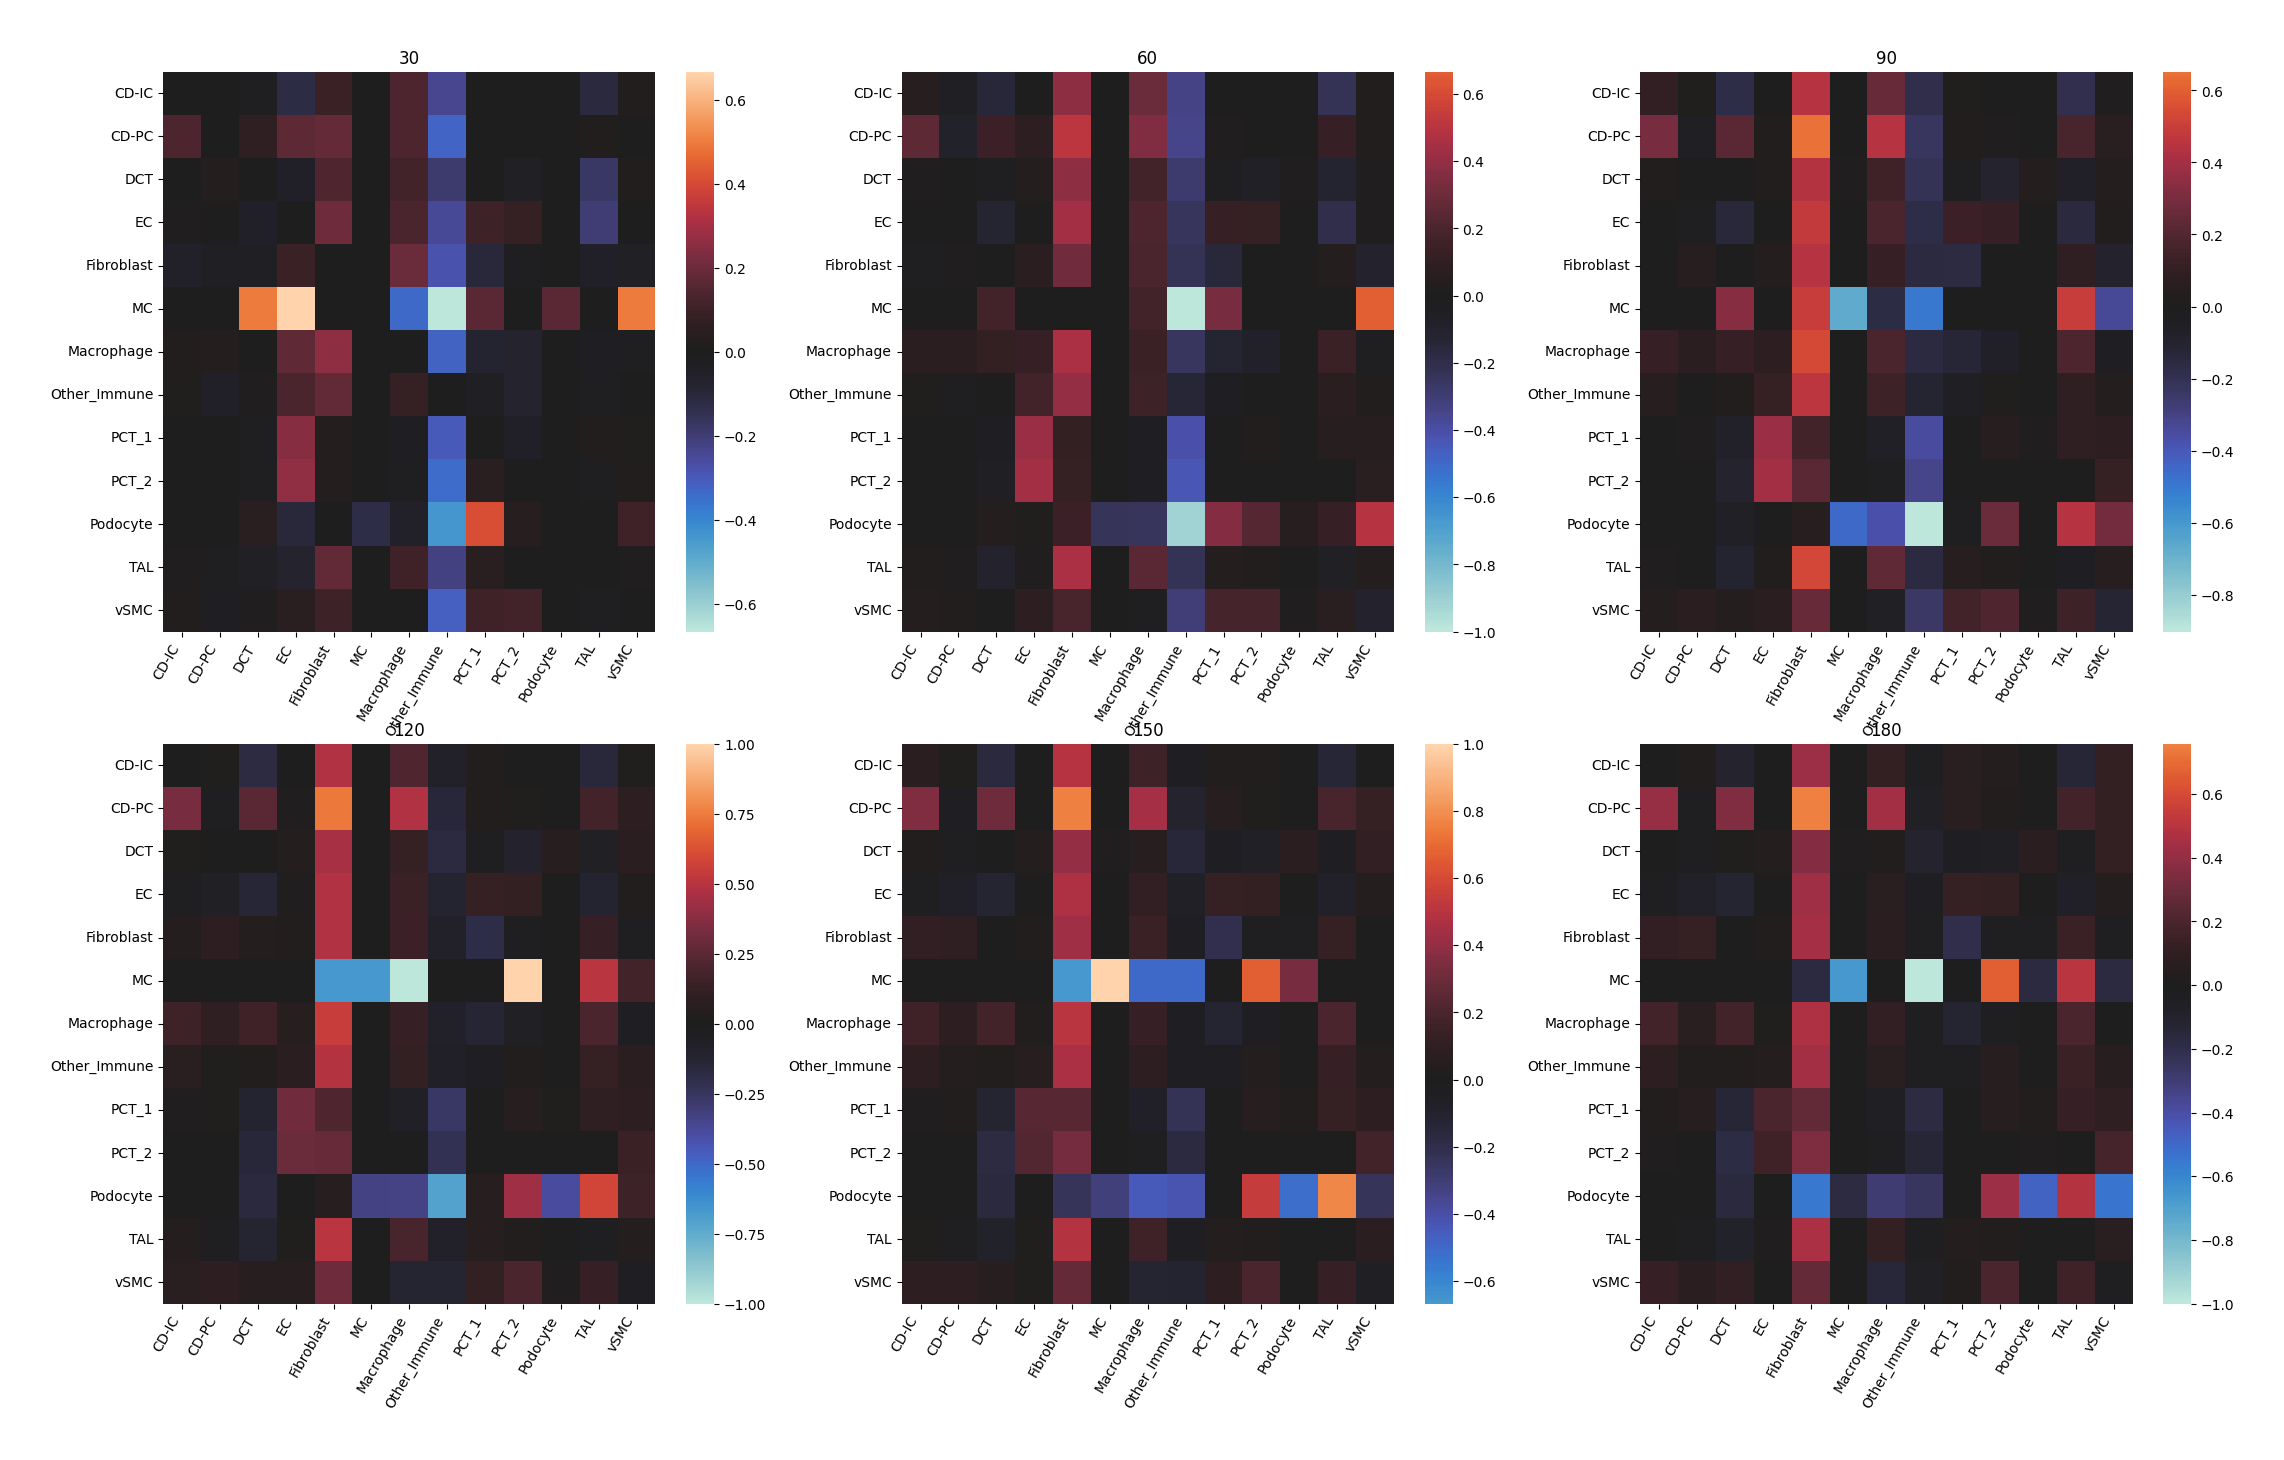

In [7]:
ms_data.plt.co_occurrence_heatmap(
    mode='integrate',
    scope=slice_generator[:],
    res_key='co-occurrence',
    cluster_res_key='author_cell_type'
    )

[2024-08-29 18:01:21][Stereo][785302][MainThread][140059044030272][ms_pipeline][131][INFO]: register plot_func co_occurrence_plot to <class 'stereo.core.stereo_exp_data.AnnBasedStereoExpData'>-140056957462992


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

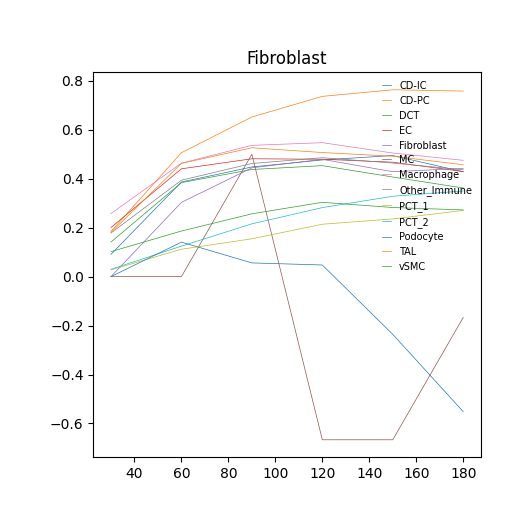

In [8]:
ms_data.plt.co_occurrence_plot(
    mode='integrate',
    scope=slice_generator[:],
    res_key='co-occurrence',
    groups=['Fibroblast']
    )

From Above, we can see the increment of co-occurrence of Fibroblase with other cell types except for MC and CD-IC from WT to UMOD KI samples.

## Cell Community Detection of Comparative Analysis

Here we also used CCD to explore local cell diversity.

See also [Cell Community Detection](https://stereopy.readthedocs.io/en/latest/Tutorials/Cell_Community_Detection.html) for more information.

In [9]:
ms_ccd = ms_data.tl.ms_community_detection(
        annotation='author_cell_type',
        win_sizes='300,150', 
        sliding_steps='150,50',
        resolution=0.2,
        # scatter_thres=0.2,
        cluster_algo='leiden',
        n_clusters=7,
        out_path="./ccd_result",
        plotting=3,
        hide_plots=True
        )

[2024-08-29 18:01:21][Stereo][785302][MainThread][140059044030272][community_detection][362][INFO]: Window size info for slice: Slice_0
                     window size: 300
                     sliding step: 150
                     cells mean: 150.62
                     cells median: 169.0
                     num horizontal windows: 16
                     num vertical windows: 16

                     
[2024-08-29 18:01:21][Stereo][785302][MainThread][140059044030272][community_detection][362][INFO]: Window size info for slice: Slice_0
                     window size: 150
                     sliding step: 50
                     cells mean: 40.51
                     cells median: 43.0
                     num horizontal windows: 32
                     num vertical windows: 32

                     
[2024-08-29 18:01:21][Stereo][785302][MainThread][140059044030272][community_detection][362][INFO]: Window size info for slice: Slice_1
                     window size: 300
       

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Visualization for CCD

[2024-08-29 18:02:26][Stereo][785302][MainThread][140059044030272][utils][27][INFO]: Function plot_spatial took 0.0739s
[2024-08-29 18:02:26][Stereo][785302][MainThread][140059044030272][utils][27][INFO]: Function plot_spatial took 0.0775s


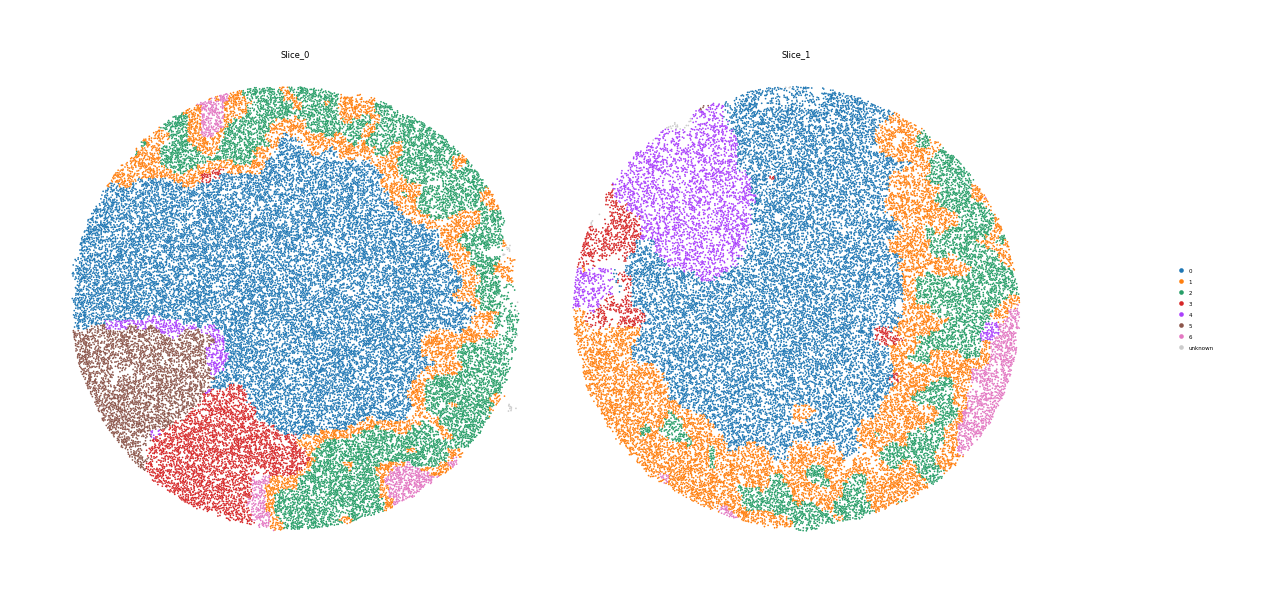

[2024-08-29 18:02:27][Stereo][785302][MainThread][140059044030272][utils][27][INFO]: Function plot_all_clustering took 1.2210s


In [10]:
ms_ccd.plot('all_clustering')

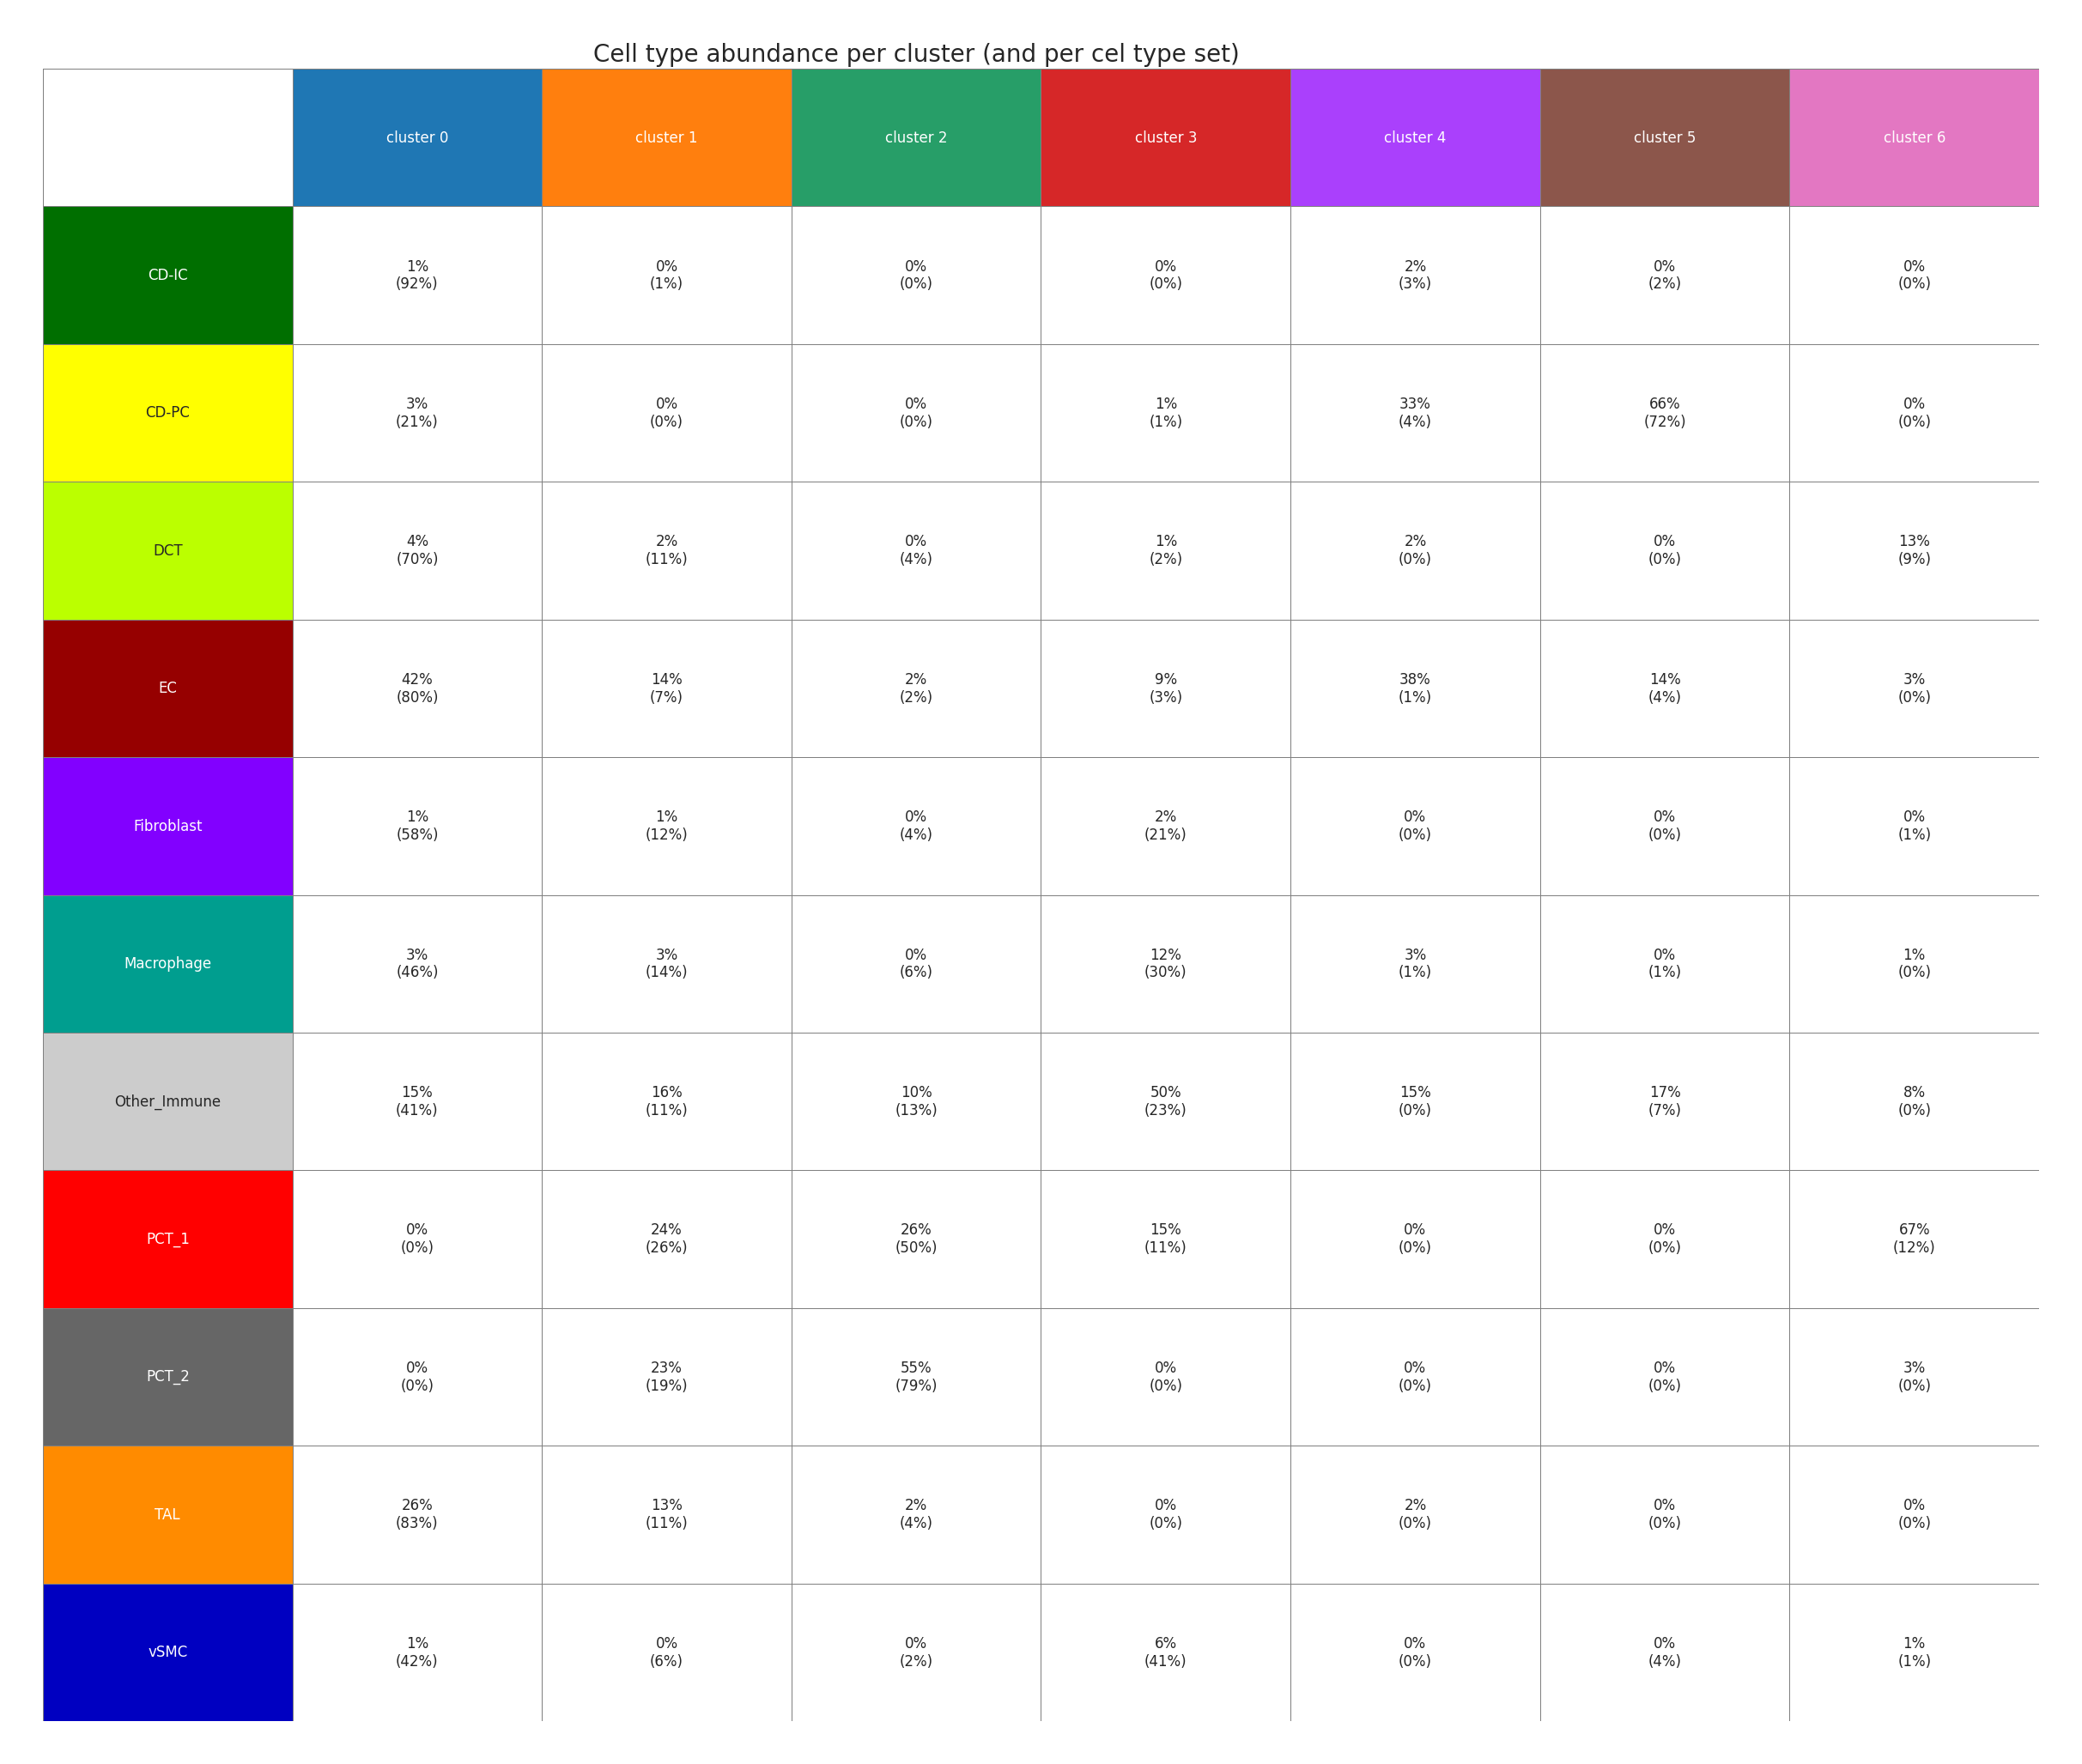

[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][utils][27][INFO]: Function plot_celltype_table took 1.6808s


<Figure size 640x480 with 0 Axes>

In [11]:
ms_ccd.plot('cell_types_table')

In [12]:
## transfer ccd result to ms_data

ms_data.to_integrate(res_key = 'cell_communities', scope = slice_generator[:], _from=slice_generator[:], type='obs', item=['cell_communities']*ms_data.num_slice)

## Manually merge cell communities to tissue

In [13]:
anno_dict = {'0':'medulla', 
             '1':'cortex', 
             '2':'boundary', 
             '3':'pelvis', 
             '4':'other_immune', 
             '5':'cortex', 
             '6':'pelvis', 
             'unknown':'unknown'}

ms_data.tl.annotation(
    mode='integrate',
    scope=slice_generator[:],
    annotation_information=anno_dict,
    cluster_res_key='cell_communities',
    res_key='tissue'
    )

ms_data.tl.annotation(
    mode='isolated',
    scope=slice_generator[:],
    annotation_information=anno_dict,
    cluster_res_key='cell_communities',
    res_key='tissue'
    )

[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run annotation
[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run annotation...
[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][pipeline_utils][27][INFO]: Can not find raw data, the data which may have been normalized will be used.
[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: annotation end, consume time 0.0768s.
[2024-08-29 18:02:29][Stereo][785302][Thread-58][140051311068736][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run annotation
[2024-08-29 18:02:29][Stereo][785302][Thread-58][140051311068736][st_pipeline][41][INFO]: start to run annotation...
[2024-08-29 18:02:29][Stereo][785302][Thread-59][140051185104448][ms_pipeline][155][INFO]: data_obj(idx=1) in ms_data start to run annotation
[2024-08-29 18:02:29][Stereo][785302][

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished


[2024-08-29 18:02:29][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run cluster_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

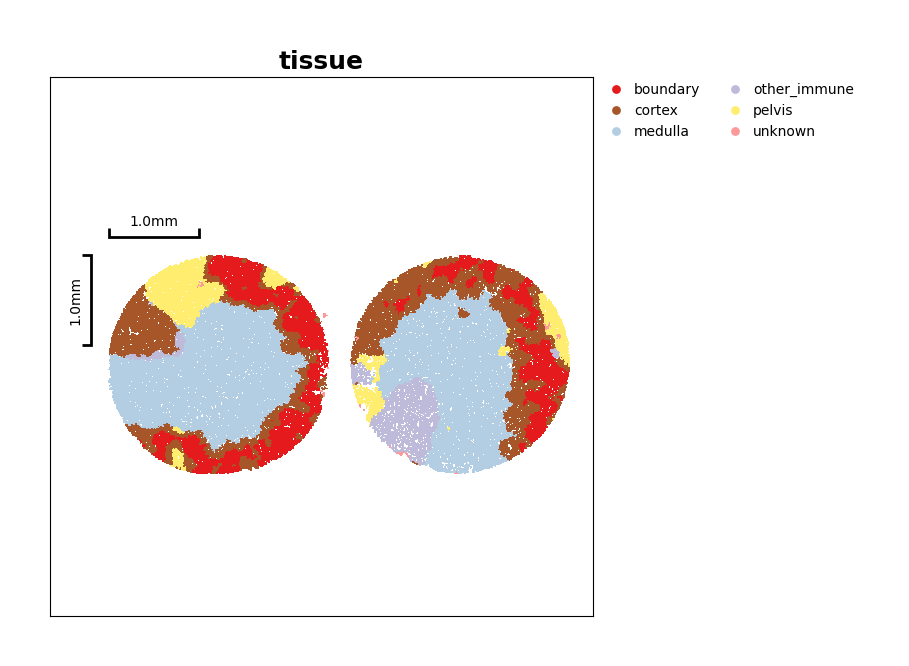

In [14]:
ms_data.plt.cluster_scatter(
    mode='integrate',
    scope=slice_generator[:],
    res_key='tissue',
    reorganize_coordinate=2,
    horizontal_offset_additional=500
    )

## Gene diversity of cell community v.s. cell type

Taken WT as example

In [15]:
ms_data.tl.raw_checkpoint(mode='isolated')
ms_data.tl.raw_checkpoint(mode='integrate')

[2024-08-29 18:02:30][Stereo][785302][Thread-63][140051068888640][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint
[2024-08-29 18:02:30][Stereo][785302][Thread-64][140051060495936][ms_pipeline][155][INFO]: data_obj(idx=1) in ms_data start to run raw_checkpoint
[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


### Preprocessing for marker

In [16]:
ms_data.tl.normalize_total()
ms_data.tl.log1p()

[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run normalize_total
[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run normalize_total...
[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: normalize_total end, consume time 0.1039s.
[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run log1p
[2024-08-29 18:02:30][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run log1p...
[2024-08-29 18:02:31][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: log1p end, consume time 0.9183s.


### Marker for tissue

In [17]:
ms_data.tl.find_marker_genes(cluster_res_key='tissue', use_highly_genes=False, use_raw =False)

[2024-08-29 18:02:31][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run find_marker_genes
[2024-08-29 18:02:31][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run find_marker_genes...
[2024-08-29 18:02:33][Stereo][785302][MainThread][140059044030272][tool_base][122][INFO]: read group information, grouping by group column.
[2024-08-29 18:02:33][Stereo][785302][MainThread][140059044030272][tool_base][151][INFO]: start to run...
[2024-08-29 18:02:33][Stereo][785302][MainThread][140059044030272][tool_base][153][INFO]: end to run.
[2024-08-29 18:02:33][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: find_marker_genes end, consume time 2.3076s.


[2024-08-29 18:02:33][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run marker_genes_heatmap


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

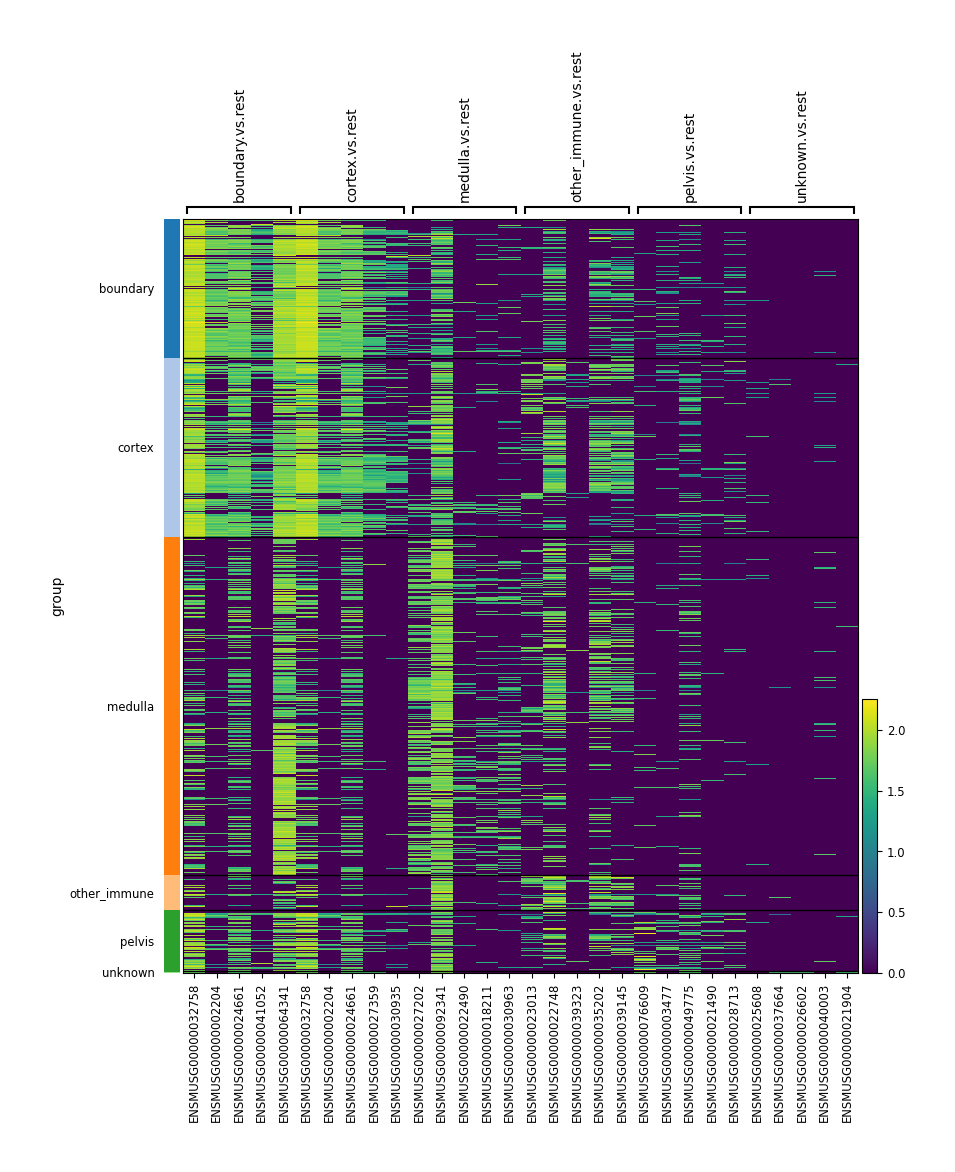

In [18]:
ms_data.plt.marker_genes_heatmap(res_key = 'marker_genes')

### Plot medulla markers

In [19]:
medulla_marker = ms_data.tl.result['scope_[0,1]']['marker_genes']['medulla.vs.rest']

medulla_marker = medulla_marker.loc[(medulla_marker['pvalues_adj'] < 0.05) & (medulla_marker['pct_rest'] < 0.2)]

medulla_marker = medulla_marker.sort_values('scores', ascending=False)
medulla_marker_list = medulla_marker['genes'][:8]
medulla_marker

,scores,pvalues,pvalues_adj,log2fc,genes,pct,pct_rest,mean_count
0,114.183655,0.0,0.0,3.426115,ENSMUSG00000027202,0.538050,0.184545,1.663084
2,61.116464,0.0,0.0,2.430726,ENSMUSG00000022490,0.225488,0.069651,0.317728
3,54.538624,0.0,0.0,2.075901,ENSMUSG00000018211,0.225950,0.088956,0.345794
4,54.307349,0.0,0.0,1.920096,ENSMUSG00000030963,0.258017,0.112316,0.429489
5,46.074215,0.0,0.0,2.126544,ENSMUSG00000001270,0.147868,0.050264,0.184752
...,...,...,...,...,...,...,...,...
22611,-84.611139,0.0,0.0,-5.021427,ENSMUSG00000024131,0.006942,0.193352,0.007207
22612,-84.693316,0.0,0.0,-4.928562,ENSMUSG00000036083,0.007372,0.195231,0.007736
22614,-84.911546,0.0,0.0,-5.308575,ENSMUSG00000027070,0.005983,0.189646,0.006182
22615,-85.269715,0.0,0.0,-5.068659,ENSMUSG00000026730,0.006777,0.194399,0.007405


[2024-08-29 18:02:34][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run marker_genes_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

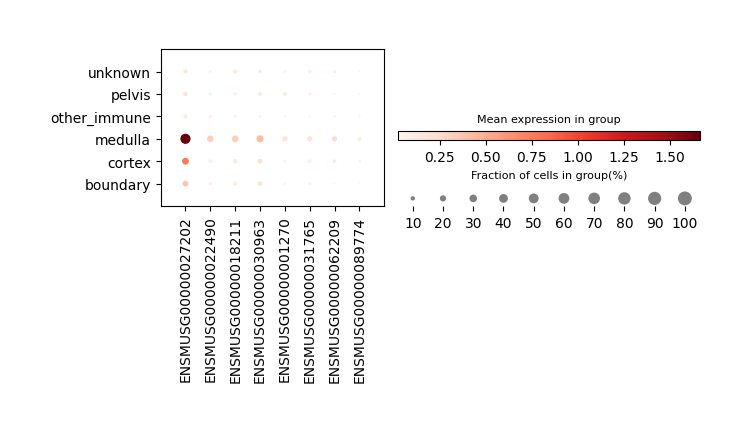

In [20]:
ms_data.plt.marker_genes_scatter(res_key = 'marker_genes', groups='medulla', genes=medulla_marker_list)

### Marker for author cell type

In [21]:
ms_data.tl.find_marker_genes(cluster_res_key='author_cell_type', use_highly_genes=False, use_raw =False, res_key = 'marker_genes_author')

[2024-08-29 18:02:35][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run find_marker_genes
[2024-08-29 18:02:35][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run find_marker_genes...
[2024-08-29 18:02:37][Stereo][785302][MainThread][140059044030272][tool_base][122][INFO]: read group information, grouping by group column.
[2024-08-29 18:02:37][Stereo][785302][MainThread][140059044030272][tool_base][151][INFO]: start to run...
[2024-08-29 18:02:38][Stereo][785302][MainThread][140059044030272][tool_base][153][INFO]: end to run.
[2024-08-29 18:02:38][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: find_marker_genes end, consume time 3.4135s.


[2024-08-29 18:02:38][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run marker_genes_heatmap


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

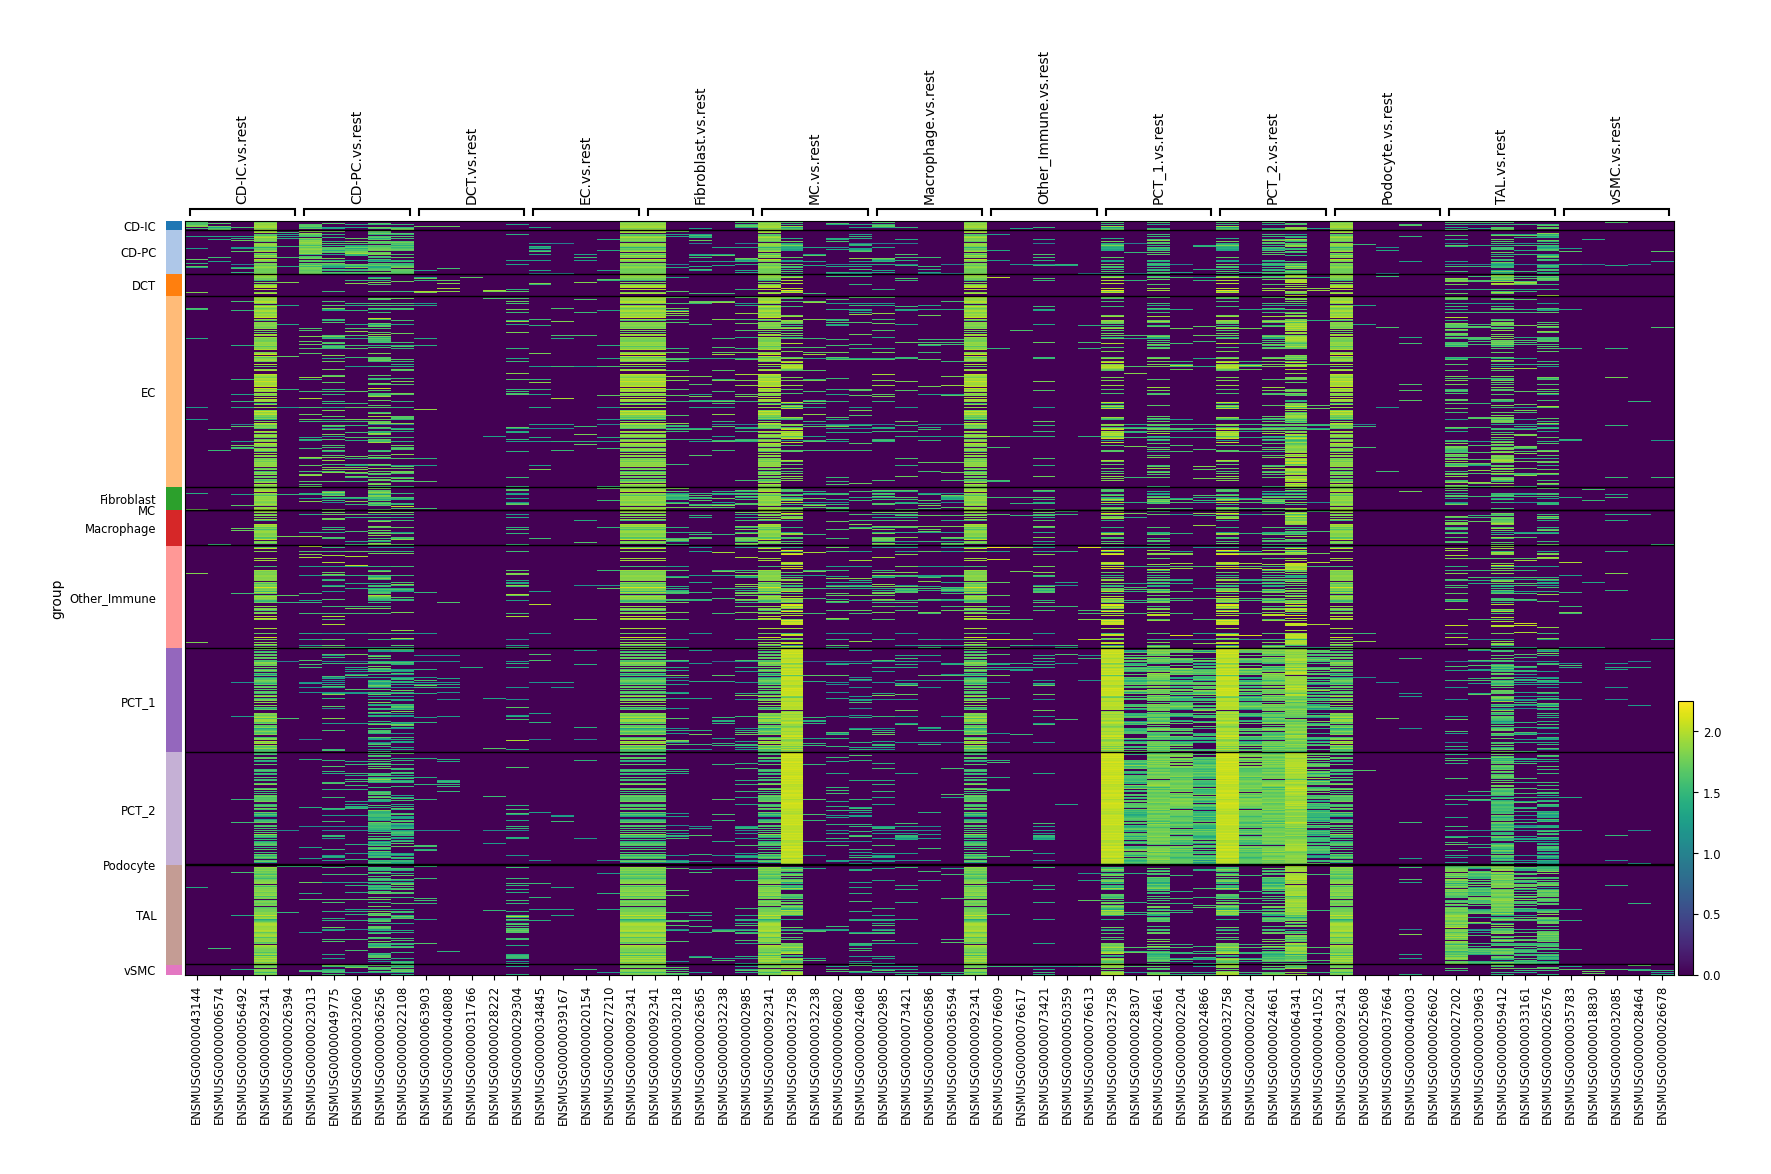

In [22]:
ms_data.plt.marker_genes_heatmap(res_key = 'marker_genes_author')

### Plot medulla corresponding celltype markers

[2024-08-29 18:02:40][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run marker_genes_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

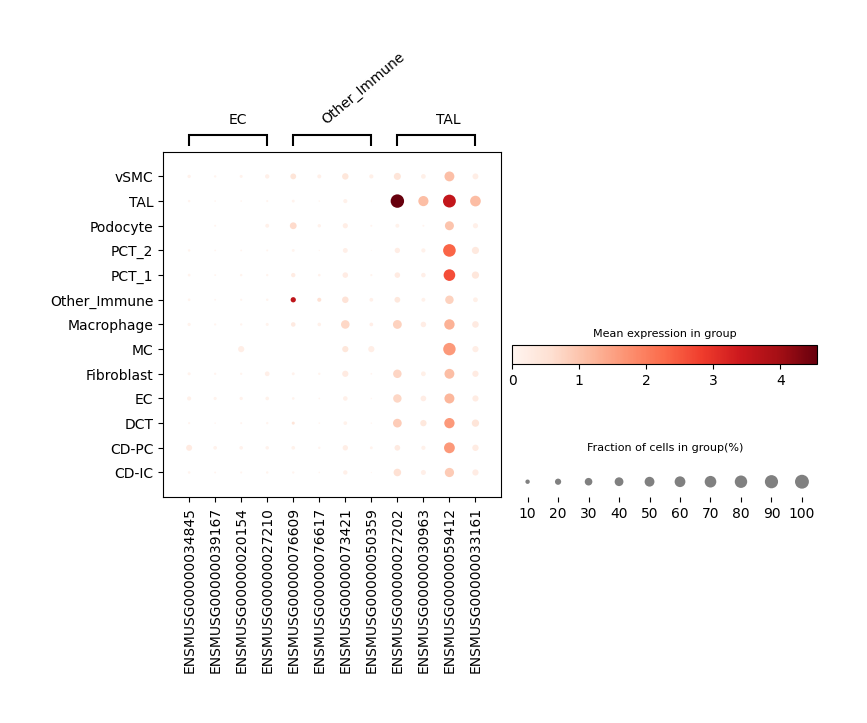

In [23]:
ms_data.plt.marker_genes_scatter(res_key='marker_genes_author', markers_num=4, groups=['EC', 'Other_Immune', 'TAL' ] )

## Conditional marker and constant marker

In [24]:
ms_data.tl.raw_checkpoint(mode='isolated')

[2024-08-29 18:02:40][Stereo][785302][Thread-82][140050918397504][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint
[2024-08-29 18:02:40][Stereo][785302][Thread-83][140051052103232][ms_pipeline][155][INFO]: data_obj(idx=1) in ms_data start to run raw_checkpoint


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


In [25]:
ms_data.tl.normalize_total(mode='isolated')
ms_data.tl.log1p(mode='isolated')

[2024-08-29 18:02:40][Stereo][785302][Thread-87][140050929411648][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run normalize_total
[2024-08-29 18:02:40][Stereo][785302][Thread-88][140050918397504][ms_pipeline][155][INFO]: data_obj(idx=1) in ms_data start to run normalize_total
[2024-08-29 18:02:40][Stereo][785302][Thread-87][140050929411648][st_pipeline][41][INFO]: start to run normalize_total...
[2024-08-29 18:02:40][Stereo][785302][Thread-88][140050918397504][st_pipeline][41][INFO]: start to run normalize_total...
[2024-08-29 18:02:41][Stereo][785302][Thread-87][140050929411648][st_pipeline][44][INFO]: normalize_total end, consume time 0.0457s.
[2024-08-29 18:02:41][Stereo][785302][Thread-88][140050918397504][st_pipeline][44][INFO]: normalize_total end, consume time 0.0673s.
[2024-08-29 18:02:41][Stereo][785302][Thread-92][140051176711744][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run log1p
[2024-08-29 18:02:41][Stereo][785302][Thread-92][1400511767

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


[2024-08-29 18:02:41][Stereo][785302][Thread-92][140051176711744][st_pipeline][44][INFO]: log1p end, consume time 0.0785s.
[2024-08-29 18:02:41][Stereo][785302][Thread-93][140050918397504][st_pipeline][44][INFO]: log1p end, consume time 0.0824s.


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished


In [26]:
ms_data.tl.find_marker_genes(cluster_res_key='tissue', use_highly_genes=False, use_raw =False, mode = 'isolated')

[2024-08-29 18:02:41][Stereo][785302][Thread-97][140051052897856][ms_pipeline][155][INFO]: data_obj(idx=0) in ms_data start to run find_marker_genes
[2024-08-29 18:02:41][Stereo][785302][Thread-98][140051043710528][ms_pipeline][155][INFO]: data_obj(idx=1) in ms_data start to run find_marker_genes
[2024-08-29 18:02:41][Stereo][785302][Thread-97][140051052897856][st_pipeline][41][INFO]: start to run find_marker_genes...
[2024-08-29 18:02:41][Stereo][785302][Thread-98][140051043710528][st_pipeline][41][INFO]: start to run find_marker_genes...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


[2024-08-29 18:02:41][Stereo][785302][Thread-97][140051052897856][tool_base][122][INFO]: read group information, grouping by group column.
[2024-08-29 18:02:41][Stereo][785302][Thread-97][140051052897856][tool_base][151][INFO]: start to run...
[2024-08-29 18:02:41][Stereo][785302][Thread-98][140051043710528][tool_base][122][INFO]: read group information, grouping by group column.
[2024-08-29 18:02:41][Stereo][785302][Thread-98][140051043710528][tool_base][151][INFO]: start to run...
[2024-08-29 18:02:42][Stereo][785302][Thread-97][140051052897856][tool_base][153][INFO]: end to run.
[2024-08-29 18:02:42][Stereo][785302][Thread-98][140051043710528][tool_base][153][INFO]: end to run.
[2024-08-29 18:02:42][Stereo][785302][Thread-97][140051052897856][st_pipeline][44][INFO]: find_marker_genes end, consume time 1.3789s.
[2024-08-29 18:02:42][Stereo][785302][Thread-98][140051043710528][st_pipeline][44][INFO]: find_marker_genes end, consume time 1.3771s.


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s finished


UMOD KI conditional marker count as `N_top_marker` increases.

In [27]:
ret = {}
for name in ms_data.merged_data.tl.result['tissue']['group'].cat.categories:
    if name != 'unknown':
        ret[name] = []
        for N_top_marker in range(200):
            ret[name].append(N_top_marker-(len(set([x for x in ms_data['UMOD_KI'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker]]) & 
                                               set([x for x in ms_data['WT'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker]]))) )

Text(0, 0.5, 'N UMOD KI conditional DEGs')

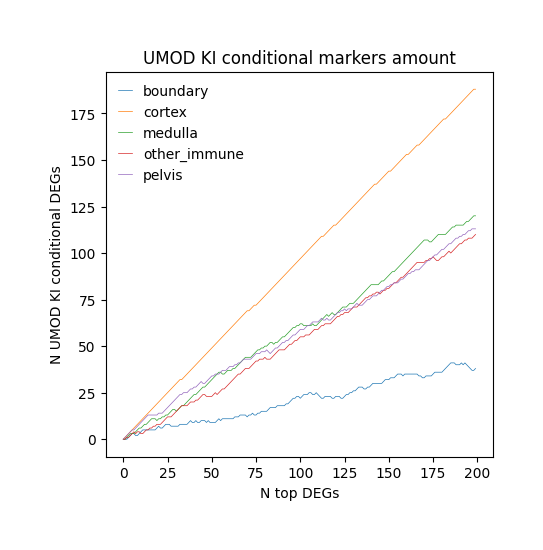

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
ax = fig.subplots()

#ct2color =  dict(zip(adata_wt.obs['tissue_domain'].cat.categories, adata_wt.uns['tissue_domain_colors'])) 

for x, y in ret.items():
    ax.plot(y, label=x)
ax.legend()
ax.set_title('UMOD KI conditional markers amount')
ax.set_xlabel('N top DEGs')
ax.set_ylabel('N UMOD KI conditional DEGs')

## Plot expression pattern for constant and conditional markers

In [29]:
N_top_marker = 200 
name = 'medulla'

In [30]:
constant_marker = list(set([x for x in ms_data['UMOD_KI'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker]]) & 
                       set([x for x in ms_data['WT'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker]]))
    
WT_conditional_marker = [x for x in ms_data['WT'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker] if x not in constant_marker][:10]
UMOD_KI_conditional_marker = [x for x in ms_data['UMOD_KI'].tl.result['marker_genes'][f'{name}.vs.rest']['genes'][:N_top_marker] if x not in constant_marker][:10]
constant_marker = constant_marker[:10]

In [31]:
all_marker_list = constant_marker
all_marker_list.extend(WT_conditional_marker)
all_marker_list.extend(UMOD_KI_conditional_marker)

In [32]:
ms_data.tl.scale()

[2024-08-29 18:05:04][Stereo][785302][MainThread][140059044030272][ms_pipeline][134][INFO]: data_obj(idx=0) in ms_data start to run scale
[2024-08-29 18:05:04][Stereo][785302][MainThread][140059044030272][st_pipeline][41][INFO]: start to run scale...
[2024-08-29 18:05:15][Stereo][785302][MainThread][140059044030272][st_pipeline][44][INFO]: scale end, consume time 11.0059s.


In [33]:
celllist = ms_data.obs.loc[(ms_data.obs['tissue'] == 'medulla') & (ms_data.obs['batch'] == '0')].index
WT_medulla_exp = ms_data.merged_data.sub_by_name(cell_name = celllist, gene_name = all_marker_list).exp_matrix

celllist = ms_data.obs.loc[(ms_data.obs['tissue'] == 'medulla') & (ms_data.obs['batch'] == '1')].index
UMOD_KI_medulla_exp = ms_data.merged_data.sub_by_name(cell_name = celllist, gene_name = all_marker_list).exp_matrix

<Axes: >

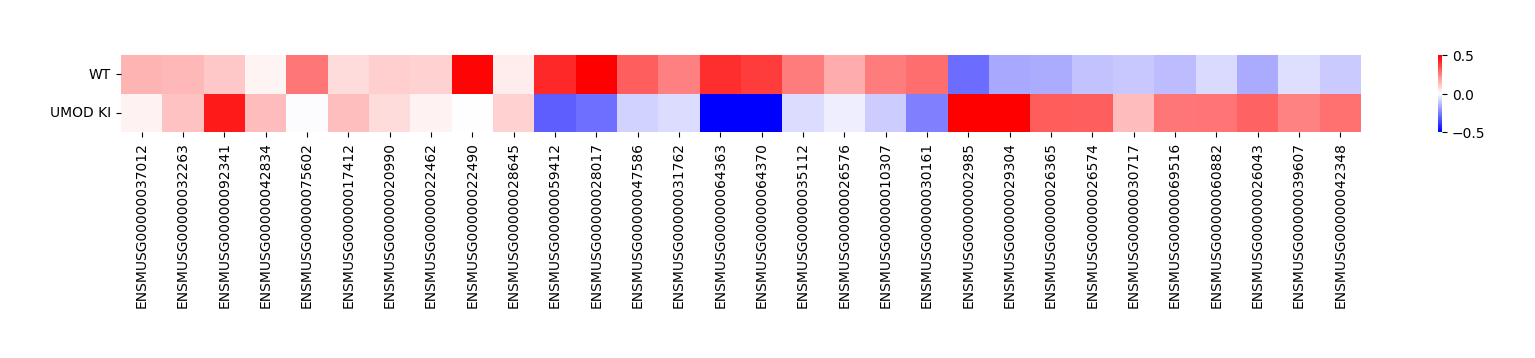

In [34]:
import pandas as pd
import seaborn as sns
medulla_exp = pd.DataFrame([WT_medulla_exp.mean(axis=0), UMOD_KI_medulla_exp.mean(axis=0)])
medulla_exp.columns = all_marker_list
medulla_exp.index = ['WT', 'UMOD KI']

fig, ax = plt.subplots(1, figsize=(20,1))
sns.heatmap(medulla_exp, center = 0, ax=ax, cmap='bwr', vmin=-0.5, vmax=0.5,)